# 데이터수집

In [1]:
import pandas as pd
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

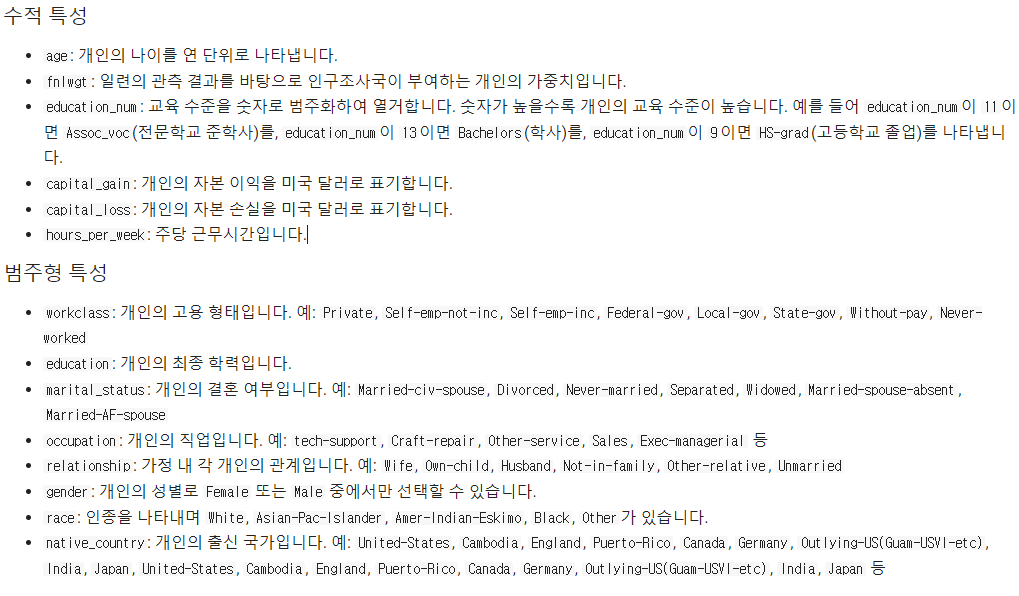

# 데이터분석

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [4]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [5]:
test.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
1,29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
2,29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [6]:
train.tail()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0
29304,29305,65,?,94809,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,40,United-States,0


In [7]:
test.tail()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19532,48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
19533,48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
19534,48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States
19535,48841,18,Private,150817,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
19536,48842,31,Private,341632,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,46,United-States


In [8]:
train.shape, test.shape

((29305, 16), (19537, 15))

In [9]:
train.describe()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,14653.000000,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,8459.769156,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7327.000000,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,14653.000000,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,21979.000000,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,29305.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
train['workclass'].unique

<bound method Series.unique of 0                  Private
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
29300              Private
29301              Private
29302     Self-emp-not-inc
29303              Private
29304                    ?
Name: workclass, Length: 29305, dtype: object>

In [12]:
train['occupation'].unique()

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', ' ?', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

In [13]:
train['native-country'].unique()

array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' ?', ' Germany', ' Peru', ' Ecuador', ' Iran',
       ' Thailand', ' Dominican-Republic', ' Poland', ' Scotland',
       ' Italy', ' Jamaica', ' China', ' Portugal', ' Columbia',
       ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [14]:
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [15]:
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [16]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 

In [17]:
train['workclass']=train['workclass'].replace(" ?",None)
train['occupation']=train['occupation'].replace(" ?",None)
train['native-country']=train['native-country'].replace(" ?",None)
test['workclass']=test['workclass'].replace(" ?",None)
test['occupation']=test['occupation'].replace(" ?",None)
test['native-country']=test['native-country'].replace(" ?",None)

In [18]:
train.isnull().sum()

no                   0
age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [19]:
test.isnull().sum()

no                   0
age                  0
workclass         1136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1141
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     362
dtype: int64

In [20]:
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [21]:
train.skew()

C:\Users\AI\AppData\Local\Temp\ipykernel_12460\3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


no                 0.000000
age                0.561713
fnlwgt             1.451305
education-num     -0.330375
capital-gain      11.822983
capital-loss       4.574764
hours-per-week     0.190320
income             1.215041
dtype: float64

In [22]:
test.skew()

C:\Users\AI\AppData\Local\Temp\ipykernel_12460\1515727625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


no                 0.000000
age                0.551233
fnlwgt             1.420341
education-num     -0.295807
capital-gain      12.005525
capital-loss       4.562399
hours-per-week     0.309013
dtype: float64

## 결측치 채우기

In [23]:
# workclass의 null값 Private로 바꿔주기
train["workclass"]= train["workclass"].fillna(" Private")

In [24]:
# 최빈값으로 대체값 채우기
train.fillna({"occupation":train["occupation"].mode()[0]},inplace=True)

In [25]:
# null others로 바꾸기
train['native-country']=train['native-country'].fillna("Others")

In [26]:
# 공백지우기
def split_title(row):
    return row.strip()
train['native-country'] = train['native-country'].apply(split_title)

In [27]:
# 묶어서 Others로 바꾸기
# title_dic={'El-Salvador':'El-Salvador', 'Cuba':'Cuba','India':'India', 'England':'England', 'South':'South','Jamaica ':'Jamaica ', 'China':'China',
#                'Dominican-Republic':'Dominican-Republic','Italy':'Italy', 'Japan':'Japan', 'Poland':'Poland','Columbia':'Columbia', 'Guatemala':'Guatemala',
#                'Haiti':'Haiti','Vietnam':'Vietnam', 'Portugal':'Portugal', 'Taiwan':'Taiwan','Iran':'Iran', 'Nicaragua':'Nicaragua', 'Peru':'Peru','Greece':'Greece',
#                'Ireland':'Ireland', 'Ecuador':'Ecuador','France':'France', 'Cambodia':'Cambodia', 'Hong':'Hong','Thailand':'Thailand', 'Outlying-US(Guam-USVI-etc)':'Outlying-US(Guam-USVI-etc)',
#                'Trinadad&Tobago':'Trinadad&Tobago','Yugoslavia':'Yugoslavia','Laos':'Laos','Hungary':'Hungary','Honduras':'Honduras','Scotland':'Scotland','Holand-Netherlands':'Holand-Netherlands'}

title_dic={'United-States':'United-States','Mexico':'Mexico','Philippines':'Philippines','Germany':'Germany',' Puerto-Rico':' Puerto-Rico','Canada':'Canada'}
title_mapping=train['native-country'].map(title_dic)
title_mapping[title_mapping.isnull()]
train['native-country']=title_mapping.fillna("Other")

In [28]:
train.isnull().sum()

no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [29]:
# workclass의 null값 Private로 바꿔주기
test["workclass"]= test["workclass"].fillna(" Private")
# 최빈값으로 대체값 채우기
test.fillna({"occupation":test["occupation"].mode()[0]},inplace=True)
# null값 other로 바꾸기
test['native-country']=test['native-country'].fillna("Others")
# 공백지우기
def split_title(row):
    return row.strip()
test['native-country'] = test['native-country'].apply(split_title)
# 그룹화해서 other로 바꾸기
title_dic={'United-States':'United-States','Mexico':'Mexico','Philippines':'Philippines','Germany':'Germany',' Puerto-Rico':' Puerto-Rico','Canada':'Canada'}
title_mapping=test['native-country'].map(title_dic)
title_mapping[title_mapping.isnull()]
test['native-country']=title_mapping.fillna("Other")

In [30]:
test.isnull().sum()

no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

# 모델링-인코딩

In [31]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [32]:
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [33]:
set(train.columns)-set(test.columns)

{'income'}

In [34]:
# 인코딩할 컬럼명만 선택
categorical_features =['workclass','education','marital-status','occupation','relationship',
                     'sex','race','native-country']

In [35]:
# 반복문으로 인코딩하기 (train)
for feature_name in categorical_features:
    one_hot=pd.get_dummies(train[feature_name], prefix=feature_name)
    train=pd.concat([train,one_hot],axis=1) # 기존 데이터의 끝에 one_hot을 붙임
    train.drop(feature_name, axis=1,inplace=True) # 기존 글자컬럼을 삭제

In [36]:
# 반복문으로 인코딩하기 (test)
for feature_name in categorical_features:
    one_hot=pd.get_dummies(test[feature_name], prefix=feature_name)
    test=pd.concat([test,one_hot],axis=1) # 기존 데이터의 끝에 one_hot을 붙임
    test.drop(feature_name, axis=1,inplace=True) # 기존 글자컬럼을 삭제

In [37]:
X_train = train.drop(['income'], axis=1)
y_train = train['income']
X_test = test

# 학습
## KNN, DicisionTree

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
# 모델 학습
knn_model= KNeighborsClassifier()
tree_model= DecisionTreeClassifier()

In [40]:
# 모델 학습
knn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
# 모델 예측
knn_pre=knn_model.predict(X_test)
tree_pre=tree_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(knn_pre,y_test)
accuracy_score(tree_pre,y_test)

NameError: name 'y_test' is not defined

In [ ]:
# 정답파일 저장(submission)
submission=pd.read_csv('./Classifier/sample_submission.csv')
submission.head()

In [ ]:
submission['income']=knn_pre
# 데이터프레임을 csv파일로 저장
submission.to_csv("./Classifier/data/knn_pre.csv",index=False)

In [ ]:
submission['income']=tree_pre
# 데이터프레임을 csv파일로 저장
submission.to_csv("./Classifier/data/tree_pre.csv",index=False)

## DicisionTree 튜닝

In [ ]:
# 교차검증함수
from sklearn.model_selection import cross_val_score

In [ ]:
train_score=[]
test_score=[]
for d in range(1,30):
    model = DecisionTreeClassifier(max_depth=d, random_state=720)
    result = cross_val_score(model, X_train, y_train,cv=5) # cv= 폴드수(5겹 교차검증), 기본값=3
    test_score.append(result.mean())

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,30), test_score, label='test')
plt.xticks(range(1,30))
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()

## 랜덤포레스트

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100, # 배깅할 모델 갯수
                                max_features=0.6,   # 각 모델이 랜덤하게 사용할 특성수 # 전체 컬럼중 몇개 뽑아쓸지, 디폴트값: 루트원래컬럼
                                max_depth=8,     # 각 모델의 최대 깊이
                                min_samples_leaf=10,  # 리프노드의 최소샘플수
                                random_state=721    # 난수고정
                               )

In [ ]:
rf_rs= cross_val_score(rf_model,X_train,y_train,cv=5)
rf_rs

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 탐색하고 싶은 하이퍼파라미터 조합을 딕셔너리로 생성
param_grid={
    'max_depth' : [5, 10, 15, 20],
    'n_estimators' : [100, 150, 200, 250],
    'max_features' : [0.5, 0.7],
    'min_samples_leaf' : [10, 20, 25]
}

In [ ]:
model=RandomForestClassifier(random_state=721)
# 튜닝할 모델, 사용할 파라미터, 교차검증 횟수
grid = GridSearchCV(model, param_grid, cv=3,n_jobs=-1) # n_jobs=-1 모든 메모리를 훈련작업에 할당

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
# 최고 점수 확인
grid.best_score_

In [ ]:
# 최고 조합으로 학습완료된 모델
best_model = grid.best_estimator_

In [ ]:
pre = best_model.predict(X_test)

In [ ]:
submission['income'] = pre
submission.to_csv("./Classifier/data/rf_pre.csv", index=False)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(booster="gbtree",   # 모델의 종류
                          n_estimators=100,   # 앙상블 모델 갯수
                          learning_rate=0.1,  # 학습률
                          max_depth=4,        # 최대깊이 (일반적으로 깊게 설정 x)
                          gamma= 0.2          # 키우면 모델 단순, 작아지면 모델이 복잡
                         )

In [ ]:
grid = GridSearchCV(model, xgb_model, cv=3,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
# 최고 점수 확인
grid.best_score_

In [ ]:
# 최고 조합으로 학습완료된 모델
best_model = grid.best_estimator_

In [ ]:
pre = best_model.predict(X_test)

In [ ]:
submission['income'] = pre
submission.to_csv("./Classifier/data/rf_pre.csv", index=False)